# Assignment 1. Computation of journal bearing

It is possible to use the Reynolds equation to compute de eccentricity and the angle of a journal bearing with fluid film lubrication, given the load $W$

![image.png](Journal_bearing1.png)

Consider that the journal is displaced in the $x$ negative direction, so that $h(\theta) = h_0(1+\varepsilon \cos(\theta))$ where $\varepsilon=\frac{e}{h_0}$ is the relative eccentricity and $h_0 = \frac{1}{2}(D_b -D_a)$ is the average gap thickness. The journal is rotating in the positive direction of $\theta$ (polar coordinates)

![image.png](Journal_bearing2.png)

1. Calculate the pressure distribution $p(\theta)$ and the value and direction of $\mathbf{W}$, in the approximation $\varepsilon \ll 1$.
2. What happens to the journal if $\mathbf{W}$ increase a little bit?
3. Apply the results to this real [example](https://www.mcmaster.com/6658K738/), and discuss the value of the maximum load given by the manufactures at this rotational velocity.
![image.png](McMaster-Carr_JB.png)

----------------------------------
# A1: GROUP 1 SOLUTION
----------------------------------


## PART 1: $p(\theta)$ and $W$
----------------------------------

### 0. Importing sympy and numpy

In [22]:
%reset -f
import numpy as np
import sympy as sp

### 1. Introducing variables into sympy and context:

To work in a cylindric phase angle domain $\theta = [-\pi,+\pi]$ and addapt the cartesian Reynolds equation (with $R\sim \frac{R_a+R_b}{2}$):

- $$ h(x) \;\;\to\;\; h(\theta) $$
- $$ dx \;\;\to\;\; R \cdot d\theta $$
- $$ U \;\;\to\;\; \Omega \cdot R $$
- $$ p_x (x) \;\;\to\;\; \frac{dp}{dx} = \frac{dp}{R \cdot d\theta} = \frac{1}{R}p_\theta (\theta)$$

REYNOLDS: In cartesian domain: 

- $$ \dfrac{U \frac{d}{dx}h(x)}{2} - \dfrac{h^3(x) \frac{d}{dx} p_x (x)}{12 \mu} - \dfrac{h^2(x) p_x (x) \frac{d}{dx} h(x)}{4 \mu} = 0$$

REYNOLDS: Transformed to cylindrical domain:

- $$ \dfrac{\frac{U}{R} \frac{d}{d\theta}h(\theta)}{2} - \dfrac{ \frac{h^3(\theta)}{R^2} \frac{d}{d\theta} p_\theta (\theta)}{12 \mu} - \dfrac{\frac{h^2(\theta)}{R^2} p_\theta (\theta) \frac{d}{d\theta} h(\theta)}{4 \mu} = 0$$

- $$ \dfrac{\Omega \frac{d}{d\theta}h(\theta)}{2} - \dfrac{ h^3(\theta) \frac{d}{d\theta} p_\theta (\theta)}{12 R^2 \mu} - \dfrac{h^2(\theta) p_\theta (\theta) \frac{d}{d\theta} h(\theta)}{4 R^2 \mu} = 0 $$


MASS BALANCE: volumetric flow $q$ in cartesian domain:

- $$ q = \int_{0}^{h(x)} u(y) dy = \left( \dfrac{U}{2 h(x)}-\dfrac{h(x)p_x(x)}{4\mu}   \right)h^2(x)+\dfrac{h^3(x)p_x(x)}{6 \mu}$$

MASS BALANCE: volumetric flow $q$ transformed to cylindrical domain:

- $$ q = \left( \dfrac{\Omega R}{2 h(\theta)}-\dfrac{h(\theta)p_\theta(\theta)}{4 R\mu} \right)h^2(\theta)+\dfrac{h^3(\theta)p_\theta(\theta)}{6 R \mu} $$

1.1 VARIABLES:

In [23]:
# VARIABLES FOR REYNOLDS: 
theta,R,mu,Omega= sp.symbols('theta,R,mu,Omega', positive=True,real=True)
h = sp.Function('h')
p_theta = sp.Function('p_theta')




1.2 REYNOLDS EQUATION (unused):

In [24]:
ReynoldsLHS = Omega*h(theta).diff(theta)/2 - (h(theta))**3*p_theta(theta).diff(theta)/(12*R**2 * mu) - (h(theta))**2 * p_theta(theta)*h(theta).diff(theta)/(4*R**2 * mu)
ReynoldsEq = sp.Eq(ReynoldsLHS,0)
display(ReynoldsEq)

Eq(Omega*Derivative(h(theta), theta)/2 - h(theta)**3*Derivative(p_theta(theta), theta)/(12*R**2*mu) - h(theta)**2*p_theta(theta)*Derivative(h(theta), theta)/(4*R**2*mu), 0)

1.3 MASS BALANCE EQUATION (the volumetric flow "intU" for the lhs of $q$):

In [25]:
intU = (Omega*R/(2*h(theta))-h(theta)*p_theta(theta)/(4*R*mu))*(h(theta))**2+(h(theta))**3*p_theta(theta)/(6*R*mu)
display(intU)

(Omega*R/(2*h(theta)) - h(theta)*p_theta(theta)/(4*R*mu))*h(theta)**2 + h(theta)**3*p_theta(theta)/(6*R*mu)

In [26]:
intU=intU.simplify()
display(intU)

Omega*R*h(theta)/2 - h(theta)**3*p_theta(theta)/(12*R*mu)

### 2. GENERIC PRESSURE DISTRIBUTION

2.1 Solving the mass flow equation to get the partial pressure $p_\theta (\theta)$:

In [27]:
q = sp.symbols('q') # volumetric flow
exp_dpdtheta = sp.solve(intU-q,p_theta(theta))
display(exp_dpdtheta[0])

6*R*mu*(Omega*R*h(theta) - 2*q)/h(theta)**3

In [28]:
p_eq = sp.Eq(p_theta(theta), exp_dpdtheta[0])
display(p_eq)

Eq(p_theta(theta), 6*R*mu*(Omega*R*h(theta) - 2*q)/h(theta)**3)

2.2 Replacing the partial pressure $p_\theta(\theta)$ with its definition $\dfrac{dp}{d\theta}$ to get the pressure distribution:

In [29]:
p = sp.Function('p')
p_eq = p_eq.replace(p_theta(theta),p(theta).diff(theta))
display(p_eq)

Eq(Derivative(p(theta), theta), 6*R*mu*(Omega*R*h(theta) - 2*q)/h(theta)**3)

In [30]:
sp.dsolve(p_eq,p(theta))

Eq(p(theta), C1 + 6*R*mu*(Omega*R*Integral(h(theta)**(-2), theta) - 2*q*Integral(h(theta)**(-3), theta)))

### 3. APPLYING GOEMTRY OF JOURNAL BEARING

3.1 For the case, $h(\theta)=h_0(1+\varepsilon \cdot cos(\theta))$:

In [31]:
h0,eps = sp.symbols('h_0,varepsilon')
p_eq = p_eq.replace(h(theta),h0*(1+eps*sp.cos(theta)))
display(p_eq)

Eq(Derivative(p(theta), theta), 6*R*mu*(Omega*R*h_0*(varepsilon*cos(theta) + 1) - 2*q)/(h_0**3*(varepsilon*cos(theta) + 1)**3))

3.2 The boundary conditions of the journal bearing are that on a given $\theta_0$ the pressure is known or fixed ($p_0$) and is the same a revolution after $(\theta_0+2\pi)$:

- After testing, trying to solve the above EDO is not feasible with sympy (takes too long and doesn't get a result), but knowing that $\varepsilon \ll 1 $, we can make a tailor series up to the first order and try solving:

In [32]:
p_eqRHS=p_eq.rhs
p_eqRHS = p_eqRHS.series(eps,0,n=2).removeO()
display(p_eqRHS)

6*Omega*R**2*mu/h_0**2 - 12*R*mu*q/h_0**3 + varepsilon*(-12*Omega*R**2*mu*cos(theta)/h_0**2 + 36*R*mu*q*cos(theta)/h_0**3)

In [33]:
p_eq = sp.Eq(p(theta).diff(theta),p_eqRHS)
display(p_eq)

Eq(Derivative(p(theta), theta), 6*Omega*R**2*mu/h_0**2 - 12*R*mu*q/h_0**3 + varepsilon*(-12*Omega*R**2*mu*cos(theta)/h_0**2 + 36*R*mu*q*cos(theta)/h_0**3))

3.3 And now we can solve the edo with sympy dsolve or integrate, using $p(\theta=0)=0$:

In [34]:
p0 = sp.symbols('p_0')
p_sol = sp.dsolve(p_eq,p(theta),ics={p(0):p0})
display(p_sol)

Eq(p(theta), 6*R*mu*(theta*(Omega*R*h_0 - 2*q) + 2*varepsilon*(-Omega*R*h_0 + 3*q)*sin(theta))/h_0**3 + p_0)

3.4 Substituting the boundary contition for the volumetric flow $p(\theta=2 \pi)=p_0$ (we use the $+2\pi$ phase to avoid using the same phase angle -although it is- than the one used for pressure):

In [35]:
q_sol = sp.solve(p_sol.replace(theta,2*sp.pi).replace(p(2*sp.pi),p0),q)[0]
display(q_sol)

Omega*R*h_0/2

3.5 Replacing the flow in the pressure distribution:

In [36]:
p_sol = p_sol.replace(q,q_sol)
display(p_sol)

Eq(p(theta), 6*Omega*R**2*mu*varepsilon*sin(theta)/h_0**2 + p_0)

### 4. RESULTANT FORCES OF THE JOURNAL BEARING:

4.1 $F_x$ and $F_y$ [N/m]:

In [37]:
p_sol_x = p_sol.rhs *(-sp.cos(theta))
Fx = p_sol_x.integrate((theta,0,2*sp.pi))
display(Fx)

0

In [38]:
p_sol_y = p_sol.rhs *(-sp.sin(theta))
Fy = p_sol_y.integrate((theta,0,2*sp.pi))
display(Fy)

-6*pi*Omega*R**2*mu*varepsilon/h_0**2

There is no resultant force in $F_x$, but the $F_y$ is negative, that means that the journal produces a lift on the negative y-axis (-y), where after seeing the problem sketch of the assignment is where the lubricant is ejected after the compressed throat and expands (with low pressure).

The $W$ can be applied in the $+y$ axis, with value of $-F_y$:

In [39]:
W=-Fy
display(W)

6*pi*Omega*R**2*mu*varepsilon/h_0**2

## PART 2: BEHAVIOUR OF THE JOURNAL ON AN INCREASE OF $W$:
-----------------------

WORK TODO

## PART 3: EXAMPLE RESULTS AND MAXIMUM LOAD:
---------------------------

WORK TODO

In [40]:
import matplotlib.pyplot as plt

# DATA: (CHECK TO USE THE EXAMPLE IN THE ASSIGNMENT TEXT, data right now arbitrary)
e_par = 0.001
Db_par = 0.05 #[m]
Da_par = 0.045 #[m]

h0_par = 0.5*(Db_par-Da_par) #[m]
eps_par = e_par/h0_par 

theta_Array = np.arange(0,361)
h_Array = h0_par*(1+eps_par*np.cos(np.radians(theta_Array)))
ground_Array = np.zeros((len(theta_Array),1))

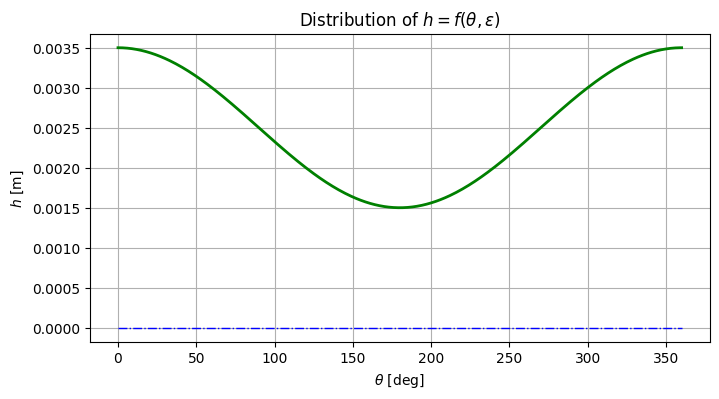

In [41]:
fig,ax = plt.subplots(figsize=(8,4))
ax.plot(theta_Array,h_Array,'g',label='Height, inner bearing)',linewidth=2)
ax.plot(theta_Array,ground_Array,'b-.',label='Ground, outer bearing',linewidth=1)
#legend = ax.legend(loc='best', shadow=True, fontsize='x-large')
ax.set_xlabel(r'$\theta$ [deg]')
ax.set_ylabel(r'$h$ [m]')
ax.set_title(r'Distribution of $h=f(\theta,\epsilon)$')
ax.grid(which='major',axis='both')

-------------------------------
# END : Assignment 1
-------------------------------

In [42]:
try:
    %load_ext watermark
except:
    !pip install watermark
%watermark -v -m -iv

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.9.13
IPython version      : 8.6.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores   : 12
Architecture: 64bit

sympy     : 1.7.1
numpy     : 1.23.4
matplotlib: 3.6.2

